# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [2]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans 

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [8]:
raw_data = pd.read_csv('Categorical.csv')
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [32]:
data = raw_data.copy()
data['continent'].unique().tolist()
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [33]:
data['continent'] = data['continent'].map({'North America':0, 'Asia':2, 'Africa':3, 'Europe':1, 'South America':4, 'Oceania':5, 'Antarctica':7, 'Seven seas (open ocean)':6})
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1


## Select the features

In [40]:
x= data.iloc[:,3:4]

## Clustering

Use 4 clusters initially.

In [53]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [54]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 4, 1, 0, 3, 3, 3, 4, 6, 4, 5, 7, 5, 2, 0, 5, 3, 4, 1, 3, 1, 1,
       4, 3, 4, 0, 0, 3, 0, 3, 0, 0, 6, 6, 0, 4, 4, 1, 1, 3, 6, 4, 1, 1,
       1, 1, 5, 6, 1, 1, 0, 0, 0, 0, 4, 4, 3, 3, 1, 0, 3, 0, 1, 6, 1, 1,
       3, 3, 1, 3, 5, 6, 3, 3, 5, 1, 3, 4, 3, 1, 1, 1, 1, 1, 3, 0, 0, 0,
       5, 6, 4, 2, 0, 3, 0, 3, 4, 3, 4, 4, 2, 3, 4, 4, 3, 4, 3, 0, 3, 4,
       4, 4, 4, 1, 4, 4, 5, 0, 4, 3, 4, 4, 4, 1, 1, 0, 3, 4, 1, 3, 3, 3,
       4, 0, 1, 3, 3, 1, 2, 0, 5, 3, 1, 3, 4, 3, 4, 5, 1, 1, 0, 2, 1, 4,
       1, 5, 1, 5, 1, 0, 5, 3, 3, 4, 5, 5, 4, 4, 0, 5, 6, 4, 5, 5, 3, 0,
       4, 3, 6, 4, 5, 4, 3, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 5, 1, 0, 3, 1,
       1, 0, 3, 1, 6, 3, 3, 3, 1, 0, 2, 4, 0, 1, 1, 4, 4, 4, 4, 5, 0, 1,
       4, 4, 1, 1, 3, 6, 0, 4, 3, 0, 6, 0, 0, 4, 5, 5, 5, 4, 1, 1, 1])

In [55]:
data_with_clusters = data.copy()
data_with_clusters['clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,clusters
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,2,4
2,Angola,17.537368,-12.293361,3,1
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,1,3
5,Aland,19.953288,60.214887,1,3
6,Andorra,1.560544,42.542291,1,3
7,United Arab Emirates,54.300167,23.905282,2,4
8,Argentina,-65.179807,-35.381349,4,6
9,Armenia,44.929933,40.289526,2,4


## Plot the data

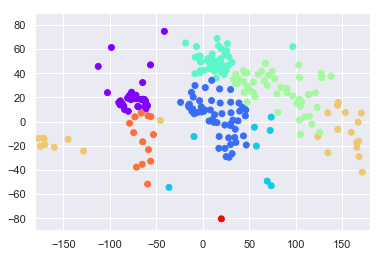

In [56]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.